In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('../Input/train.csv')

1595

In [45]:
#df[df["severe_toxic"]==1]
df.severe_toxic == df.toxic

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12        False
13         True
14         True
15         True
16        False
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
159541    False
159542     True
159543     True
159544     True
159545     True
159546    False
159547     True
159548     True
159549     True
159550     True
159551     True
159552     True
159553     True
159554    False
159555     True
159556     True
159557     True
159558     True
159559     True
159560     True
159561     True
159562     True
159563     True
159564     True
159565     True
159566     True
159567     True
159568     True
159569     True
159570     True
Length: 159571, dtype: b

In [39]:
print("Number of rows in data =",df.shape[0])
print("Number of columns in data =",df.shape[1])
print("\n")
print("**Sample data:**")
df.head()

Number of rows in data = 159571
Number of columns in data = 8


**Sample data:**


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [40]:
df_toxic = df.drop(['id', 'comment_text'], axis=1)
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [41]:
# df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=False, figsize=(8, 5))
# plt.title("Number of comments per category")
# plt.ylabel('# of Occurrences', fontsize=12)
# plt.xlabel('Type of toxicity', fontsize=12)

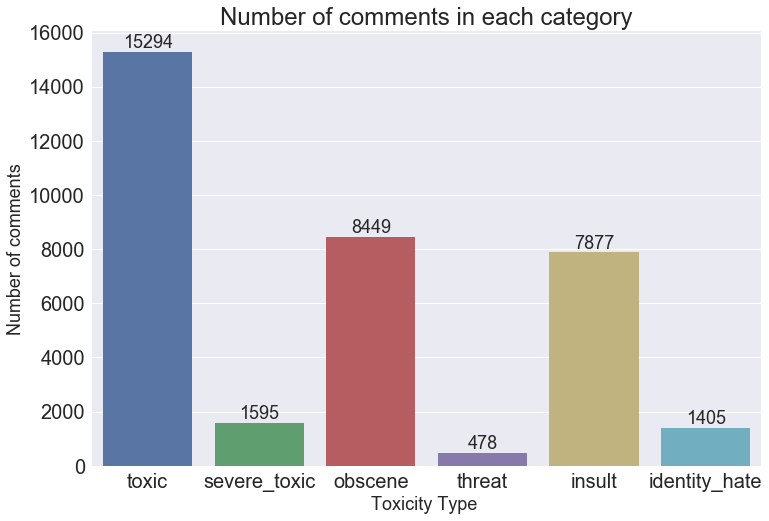

In [42]:
categories = list(df_toxic.columns.values)
sns.set(font_scale = 2)
plt.figure(figsize=(12,8))
ax= sns.barplot(categories, df_toxic.iloc[:,:].sum().values)
plt.title("Number of comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Toxicity Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = df_toxic.iloc[:,:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

#### All severe_toxic comments are also by default gets toxic label

In [69]:
print('Total number of comments labeled as toxic are: {}\n Total number of severe toxic comments are: {}'.format(df['toxic'].sum(), df['severe_toxic'].sum())) 

Total number of comments labeled as toxic are: 15294
 Total number of severe toxic comments are: 1595


In [72]:
# Dataframe that contains all the comments that are labeled as a severe toxic comments
df1 = df[df['severe_toxic']==1]
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
181,006e87872c8b370c,you are a stupid fuck \n\nand your mother's cu...,1,1,1,0,1,0
442,01208d2b76624130,Hi \n\nIm a fucking bitch.\n\n50.180.208.181,1,1,1,0,1,0
579,018663f910e0bfe6,What a motherfucking piece of crap those fuckh...,1,1,1,0,1,0


In [73]:
# Can be seen all the comments which are severe_toxic are labeled as toxic comments 
(df1.severe_toxic == df1.toxic).sum()

1595

In [82]:
df.comment_text[442]

'Hi \n\nIm a fucking bitch.\n\n50.180.208.181'